In [3]:
model_file = r"g:\SpineUs\TrainingOutput\model_traced.pt"
test_data_folder = r"g:\SpineUs\TestingDataPrep"

In [4]:
import torch
import random

from torchvision import transforms

from UltrasoundDataset import UltrasoundDataset

transform = transforms.Resize((128, 128))
test_dataset = UltrasoundDataset(test_data_folder, transform=transform)

# Load model and set to eval mode

model = torch.jit.load(model_file)

# Get a random sample of 5 images from the test dataset

sample = random.sample(range(len(test_dataset)), 5)

# Get the input images and labels from the sample

inputs = torch.stack([test_dataset[i][0] for i in sample])
labels = torch.stack([test_dataset[i][1] for i in sample])

# Get the predictions from the model

logits = model(inputs)
outputs = torch.sigmoid(logits)

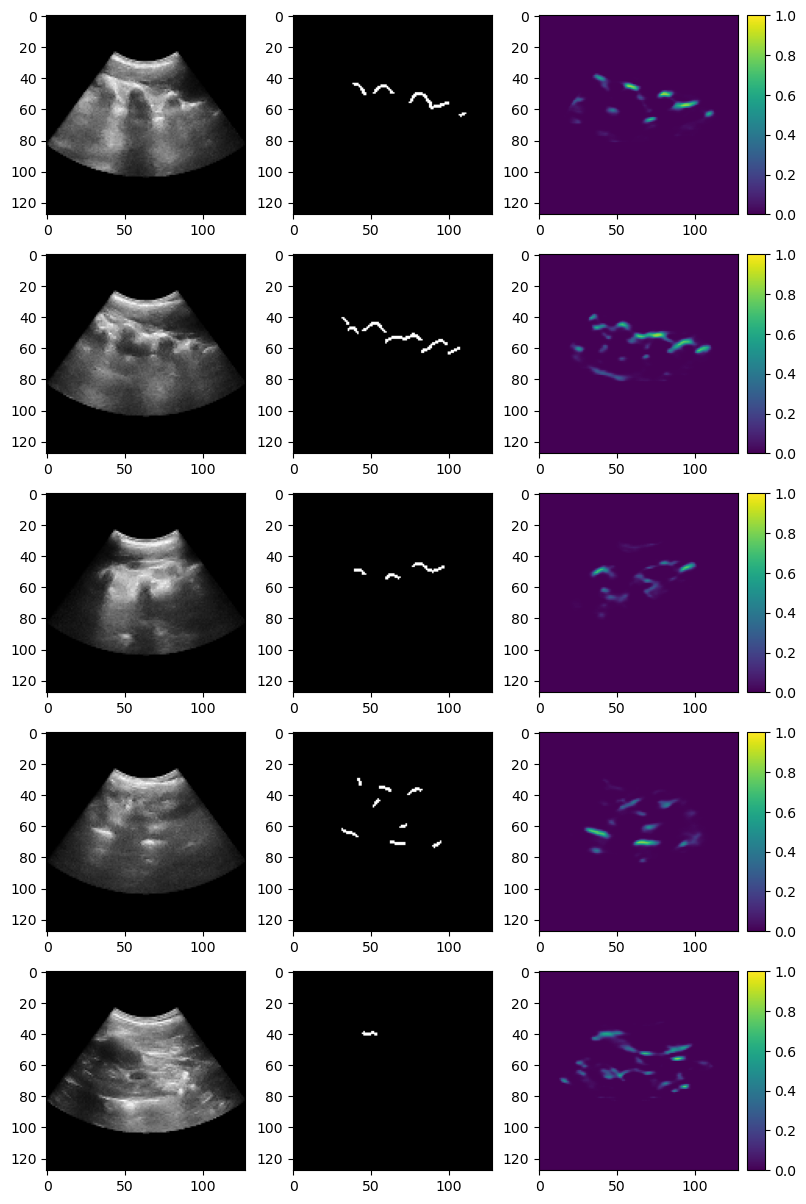

In [5]:

# Visualize the results with a colorbars

import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(5, 3, figsize=(9, 15))
for i in range(5):
    axes[i, 0].imshow(inputs[i, 0, :, :], cmap="gray")
    axes[i, 1].imshow(labels[i].squeeze(), cmap="gray")
    im = axes[i, 2].imshow(outputs[i].squeeze().detach().numpy(), vmin=0, vmax=1, cmap="viridis")
    
    # Create an additional axis for the colorbar
    cax = fig.add_axes([axes[i, 2].get_position().x1 + 0.01,
                        axes[i, 2].get_position().y0,
                        0.02,
                        axes[i, 2].get_position().height])
    fig.colorbar(im, cax=cax)

plt.show()